## EDA on Redfin Public Data

Loading data...
✓ Loaded 9,428,150 rows and 58 columns

DATASET OVERVIEW

Dataset shape: (9428150, 58)

Columns (58):
   1. PERIOD_BEGIN
   2. PERIOD_END
   3. PERIOD_DURATION
   4. REGION_TYPE
   5. REGION_TYPE_ID
   6. TABLE_ID
   7. IS_SEASONALLY_ADJUSTED
   8. REGION
   9. CITY
  10. STATE
  11. STATE_CODE
  12. PROPERTY_TYPE
  13. PROPERTY_TYPE_ID
  14. MEDIAN_SALE_PRICE
  15. MEDIAN_SALE_PRICE_MOM
  16. MEDIAN_SALE_PRICE_YOY
  17. MEDIAN_LIST_PRICE
  18. MEDIAN_LIST_PRICE_MOM
  19. MEDIAN_LIST_PRICE_YOY
  20. MEDIAN_PPSF
  21. MEDIAN_PPSF_MOM
  22. MEDIAN_PPSF_YOY
  23. MEDIAN_LIST_PPSF
  24. MEDIAN_LIST_PPSF_MOM
  25. MEDIAN_LIST_PPSF_YOY
  26. HOMES_SOLD
  27. HOMES_SOLD_MOM
  28. HOMES_SOLD_YOY
  29. PENDING_SALES
  30. PENDING_SALES_MOM
  31. PENDING_SALES_YOY
  32. NEW_LISTINGS
  33. NEW_LISTINGS_MOM
  34. NEW_LISTINGS_YOY
  35. INVENTORY
  36. INVENTORY_MOM
  37. INVENTORY_YOY
  38. MONTHS_OF_SUPPLY
  39. MONTHS_OF_SUPPLY_MOM
  40. MONTHS_OF_SUPPLY_YOY
  41. MEDIAN_DOM
  42

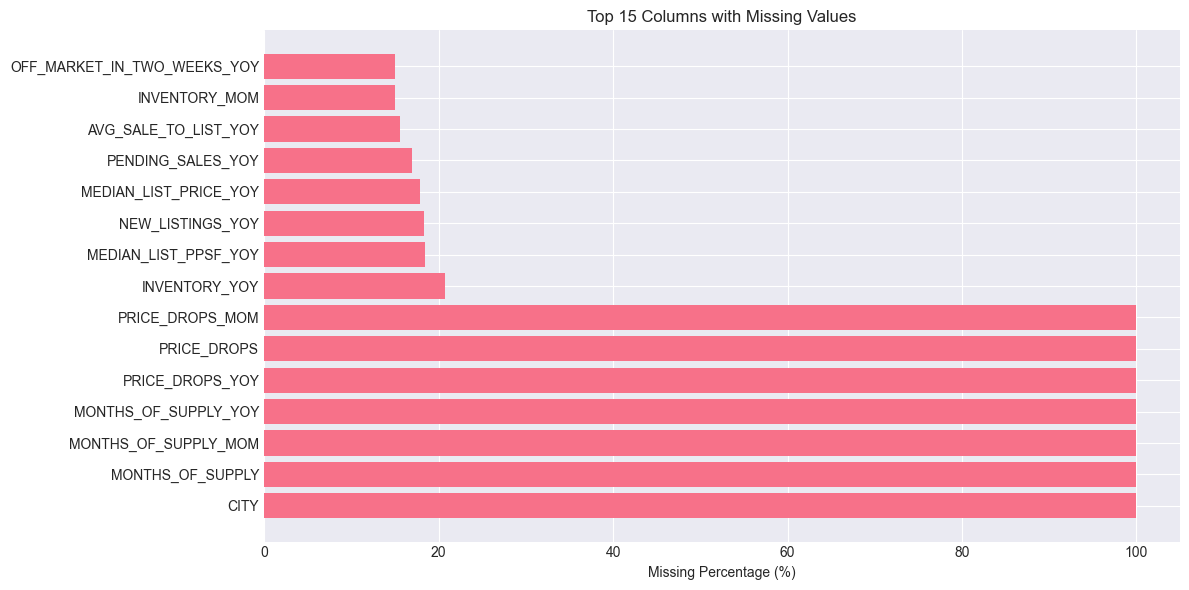


TIME PERIOD ANALYSIS

Date range: 2012-01-01 00:00:00 to 2025-12-31 00:00:00
Period duration values: [90]

Number of time periods: 166
Average records per period: 56796


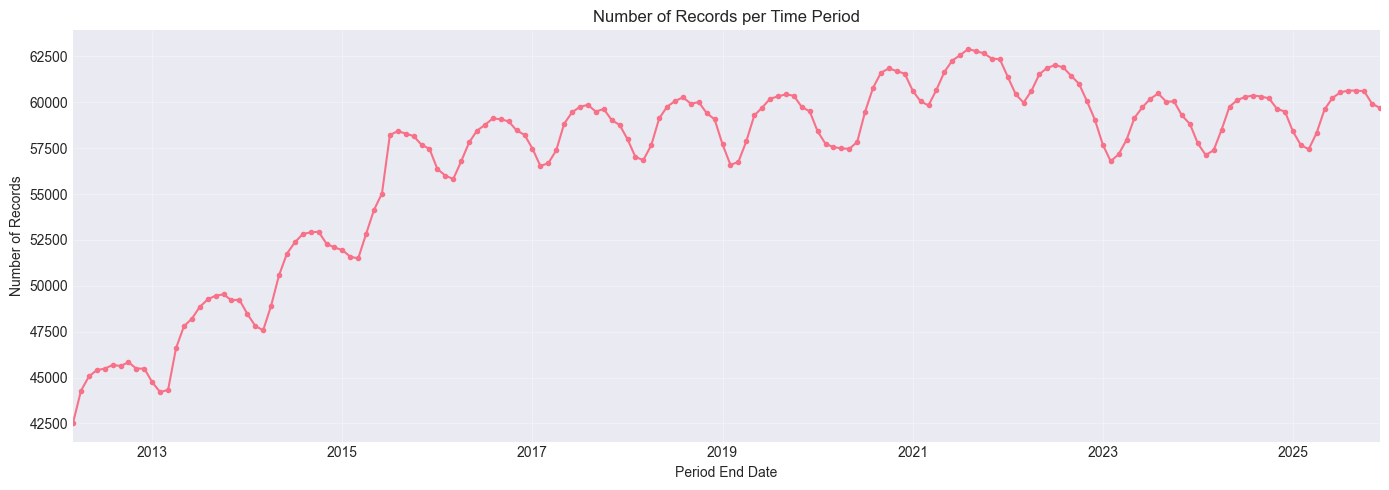


GEOGRAPHIC COVERAGE

Number of states: 51

Top 10 states by number of records:
STATE
California       855195
New York         598561
Pennsylvania     566222
Florida          543124
Texas            529794
Illinois         431831
Ohio             401245
Michigan         306514
Massachusetts    303870
New Jersey       273596
Name: count, dtype: int64

Number of unique ZIP codes: 24600

Property types:
PROPERTY_TYPE
All Residential              3198309
Single Family Residential    3143040
Condo/Co-op                  1176488
Townhouse                     988442
Multi-Family (2-4 Unit)       921871
Name: count, dtype: int64


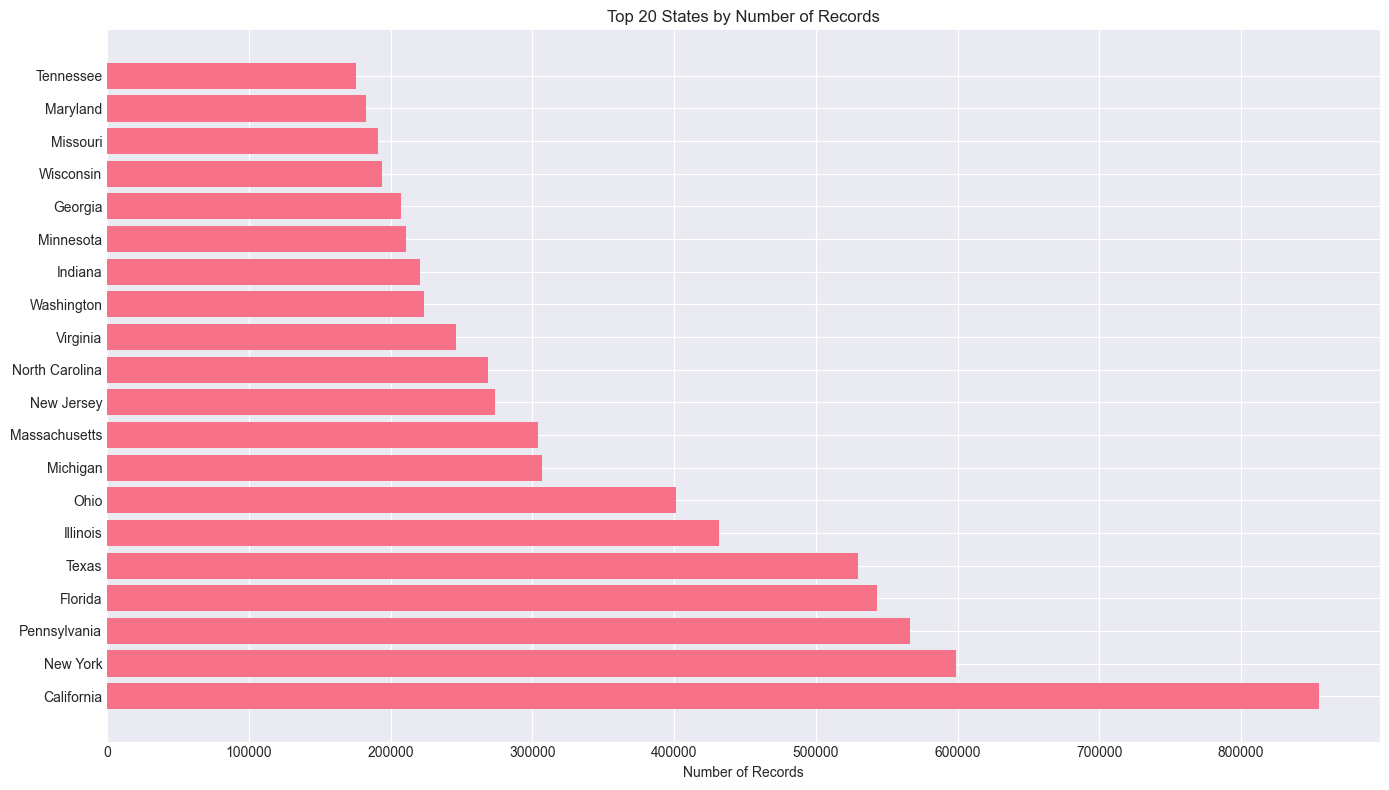


PRICE ANALYSIS

Median Sale Price Statistics (Latest Period):
count    2.455300e+04
mean     4.143846e+05
std      5.611965e+05
min      1.230000e+02
25%      1.990000e+05
50%      3.075000e+05
75%      4.750000e+05
max      2.800000e+07
Name: MEDIAN_SALE_PRICE, dtype: float64


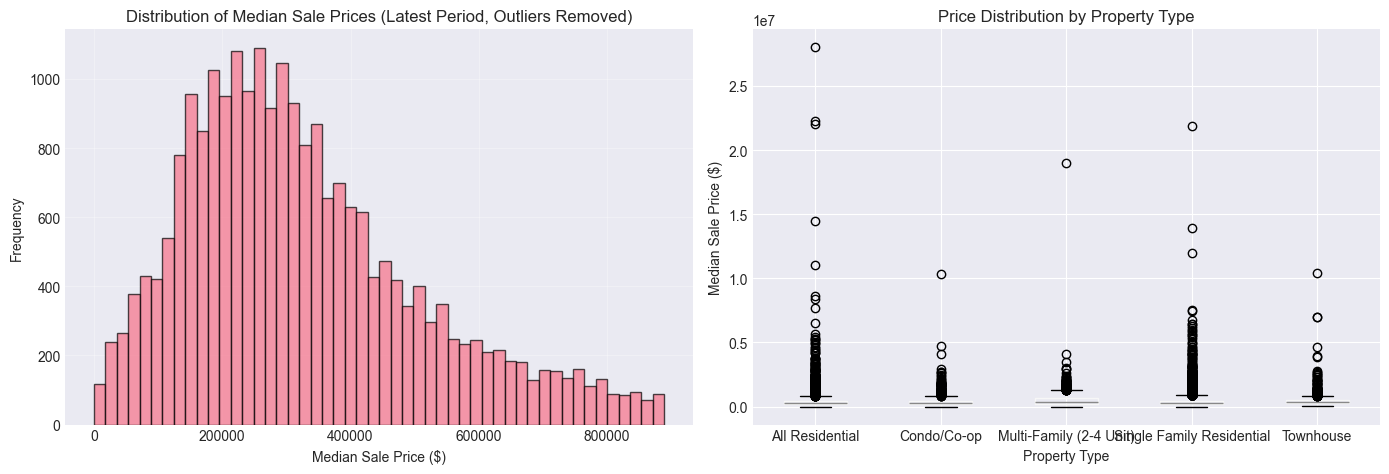


Top 10 Most Expensive ZIP Codes (Latest Period):
         REGION  CITY      STATE  MEDIAN_SALE_PRICE
Zip Code: 93150   NaN California         28000000.0
Zip Code: 89402   NaN     Nevada         22250000.0
Zip Code: 10278   NaN   New York         22000000.0
Zip Code: 83354   NaN      Idaho         21875000.0
Zip Code: 11968   NaN   New York         19000000.0
Zip Code: 94074   NaN California         14500000.0
Zip Code: 59640   NaN    Montana         13950000.0
Zip Code: 10021   NaN   New York         12002500.0
Zip Code: 87316   NaN New Mexico         11000000.0
Zip Code: 81611   NaN   Colorado         10451000.0

MARKET TRENDS

Median Sale Price YoY Change:
count    19093.000000
mean         0.168985
std          3.124936
min         -0.996038
25%         -0.105172
50%          0.016780
75%          0.175862
max        312.571429
Name: MEDIAN_SALE_PRICE_YOY, dtype: float64

Homes Sold YoY Change:
count    19094.000000
mean         0.163811
std          0.837717
min         -0.993464


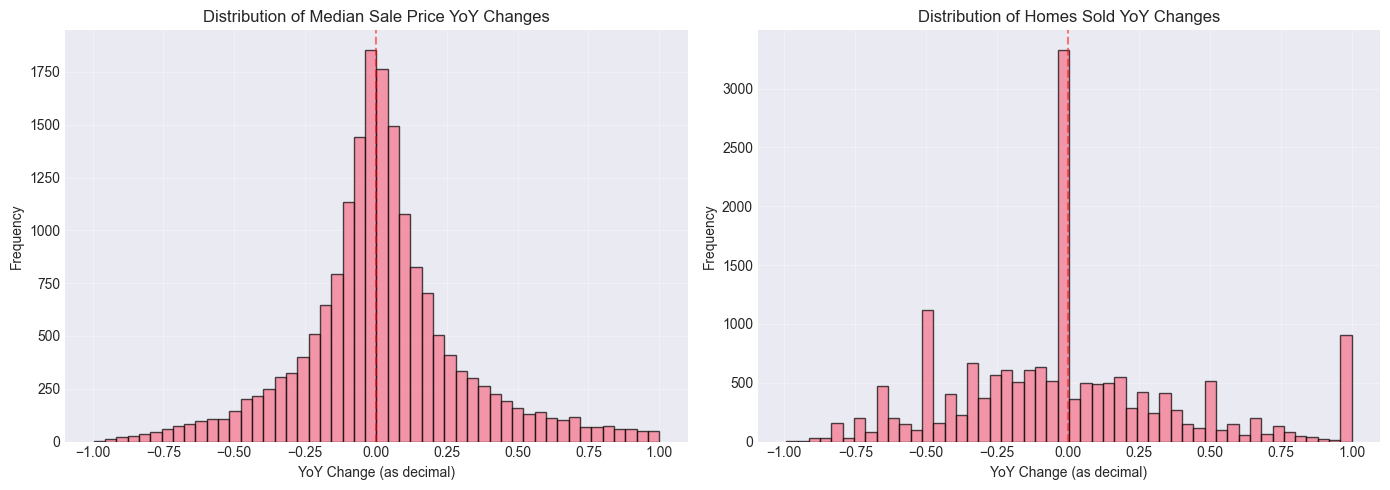


INVENTORY & SUPPLY METRICS

Months of Supply Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MONTHS_OF_SUPPLY, dtype: float64

Inventory Statistics:
count    18919.000000
mean        27.068080
std         53.147545
min          1.000000
25%          3.000000
50%          9.000000
75%         27.000000
max        870.000000
Name: INVENTORY, dtype: float64


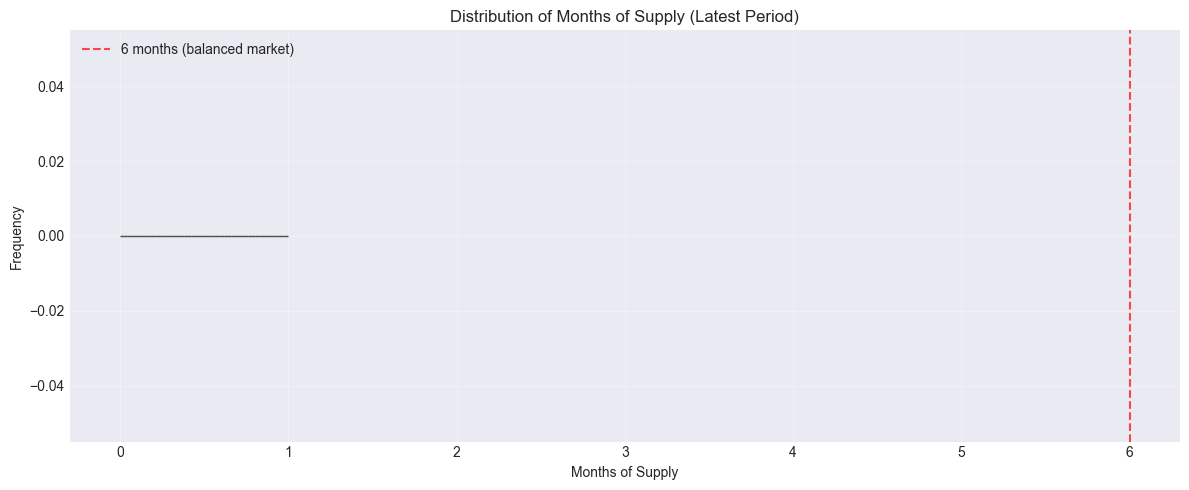


CORRELATION ANALYSIS

KEY INSIGHTS SUMMARY

1. Dataset contains 9,428,150 records across 51 states
2. Date range: 2012-01-01 to 2025-12-31
3. 24,600 unique ZIP codes
4. Latest period median sale price: $307,500
5. 43 columns have missing values
6. Property types: All Residential, Condo/Co-op, Townhouse, Single Family Residential, Multi-Family (2-4 Unit)


✓ EDA Complete!

Next steps:
- Filter to specific states or time periods
- Analyze specific markets or property types
- Create time series analysis for specific ZIPs
- Add geocoding for mapping visualization


In [7]:
# Redfin Housing Data - Exploratory Data Analysis
# This notebook explores the Redfin ZIP code market data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD THE DATA
# ============================================================================

# Adjust path as needed
file_path = Path("../data/redfin/raw/redfin_zip_all_states.tsv")

print("Loading data...")
df = pd.read_csv(file_path, sep='\t', low_memory=False)
print(f"✓ Loaded {len(df):,} rows and {len(df.columns)} columns")

# ============================================================================
# 2. BASIC OVERVIEW
# ============================================================================

print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)

# Shape
print(f"\nDataset shape: {df.shape}")

# Column names
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Data types
print("\nData types:")
print(df.dtypes.value_counts())

# Memory usage
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# First few rows
print("\nFirst 5 rows:")
df.head()

# ============================================================================
# 3. MISSING VALUES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("MISSING VALUES")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"\nColumns with missing values: {len(missing_df)}/{len(df.columns)}")
print("\nTop 10 columns with most missing values:")
print(missing_df)

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(15)
    plt.barh(top_missing.index, top_missing['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 15 Columns with Missing Values')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. TIME PERIOD ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("TIME PERIOD ANALYSIS")
print("="*80)

# Convert date columns
df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
df['PERIOD_END'] = pd.to_datetime(df['PERIOD_END'])

print(f"\nDate range: {df['PERIOD_BEGIN'].min()} to {df['PERIOD_END'].max()}")
print(f"Period duration values: {df['PERIOD_DURATION'].unique()}")

# Records by period
period_counts = df.groupby('PERIOD_END').size().sort_index()
print(f"\nNumber of time periods: {len(period_counts)}")
print(f"Average records per period: {period_counts.mean():.0f}")

# Plot records over time
plt.figure(figsize=(14, 5))
period_counts.plot(kind='line', marker='o', markersize=3)
plt.title('Number of Records per Time Period')
plt.xlabel('Period End Date')
plt.ylabel('Number of Records')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. GEOGRAPHIC COVERAGE
# ============================================================================

print("\n" + "="*80)
print("GEOGRAPHIC COVERAGE")
print("="*80)

# States
print(f"\nNumber of states: {df['STATE'].nunique()}")
print("\nTop 10 states by number of records:")
print(df['STATE'].value_counts().head(10))

# ZIP codes
print(f"\nNumber of unique ZIP codes: {df['REGION'].nunique()}")

# Property types
print("\nProperty types:")
print(df['PROPERTY_TYPE'].value_counts())

# Visualize state distribution
plt.figure(figsize=(14, 8))
state_counts = df['STATE'].value_counts().head(20)
plt.barh(state_counts.index, state_counts.values)
plt.xlabel('Number of Records')
plt.title('Top 20 States by Number of Records')
plt.tight_layout()
plt.show()

# ============================================================================
# 6. PRICE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("PRICE ANALYSIS")
print("="*80)

# Get latest data for each ZIP
latest_df = df.sort_values('PERIOD_END').groupby('REGION').tail(1)

# Median sale price stats
print("\nMedian Sale Price Statistics (Latest Period):")
print(latest_df['MEDIAN_SALE_PRICE'].describe())

# Remove outliers for visualization
price_data = latest_df['MEDIAN_SALE_PRICE'].dropna()
q1 = price_data.quantile(0.25)
q3 = price_data.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
price_filtered = price_data[(price_data >= lower) & (price_data <= upper)]

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(price_filtered, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Median Sale Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Median Sale Prices (Latest Period, Outliers Removed)')
axes[0].grid(True, alpha=0.3)

# Box plot by property type
latest_df.boxplot(column='MEDIAN_SALE_PRICE', by='PROPERTY_TYPE', ax=axes[1])
axes[1].set_xlabel('Property Type')
axes[1].set_ylabel('Median Sale Price ($)')
axes[1].set_title('Price Distribution by Property Type')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Top 10 most expensive ZIP codes
print("\nTop 10 Most Expensive ZIP Codes (Latest Period):")
top_expensive = latest_df.nlargest(10, 'MEDIAN_SALE_PRICE')[['REGION', 'CITY', 'STATE', 'MEDIAN_SALE_PRICE']]
print(top_expensive.to_string(index=False))

# ============================================================================
# 7. MARKET TRENDS
# ============================================================================

print("\n" + "="*80)
print("MARKET TRENDS")
print("="*80)

# Year-over-year changes
print("\nMedian Sale Price YoY Change:")
print(latest_df['MEDIAN_SALE_PRICE_YOY'].describe())

print("\nHomes Sold YoY Change:")
print(latest_df['HOMES_SOLD_YOY'].describe())

# Visualize YoY changes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price YoY
yoy_price = latest_df['MEDIAN_SALE_PRICE_YOY'].dropna()
yoy_price_filtered = yoy_price[(yoy_price >= -1) & (yoy_price <= 1)]  # Remove extreme outliers
axes[0].hist(yoy_price_filtered, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('YoY Change (as decimal)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Median Sale Price YoY Changes')
axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[0].grid(True, alpha=0.3)

# Homes sold YoY
yoy_sold = latest_df['HOMES_SOLD_YOY'].dropna()
yoy_sold_filtered = yoy_sold[(yoy_sold >= -1) & (yoy_sold <= 1)]
axes[1].hist(yoy_sold_filtered, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('YoY Change (as decimal)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Homes Sold YoY Changes')
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. INVENTORY AND SUPPLY
# ============================================================================

print("\n" + "="*80)
print("INVENTORY & SUPPLY METRICS")
print("="*80)

print("\nMonths of Supply Statistics:")
print(latest_df['MONTHS_OF_SUPPLY'].describe())

print("\nInventory Statistics:")
print(latest_df['INVENTORY'].describe())

# Visualize months of supply
supply_data = latest_df['MONTHS_OF_SUPPLY'].dropna()
supply_filtered = supply_data[supply_data <= 12]  # Remove extreme outliers

plt.figure(figsize=(12, 5))
plt.hist(supply_filtered, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Months of Supply')
plt.ylabel('Frequency')
plt.title('Distribution of Months of Supply (Latest Period)')
plt.axvline(x=6, color='red', linestyle='--', label='6 months (balanced market)', alpha=0.7)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 9. CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = [
    'MEDIAN_SALE_PRICE', 'MEDIAN_LIST_PRICE', 'MEDIAN_PPSF',
    'HOMES_SOLD', 'PENDING_SALES', 'NEW_LISTINGS', 
    'INVENTORY', 'MONTHS_OF_SUPPLY', 'MEDIAN_DOM'
]

# Filter to columns that exist
numeric_cols = [col for col in numeric_cols if col in latest_df.columns]

correlation_data = latest_df[numeric_cols].dropna()

if len(correlation_data) > 0:
    corr_matrix = correlation_data.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix of Key Metrics')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 10. SUMMARY
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print(f"""
1. Dataset contains {len(df):,} records across {df['STATE'].nunique()} states
2. Date range: {df['PERIOD_BEGIN'].min().strftime('%Y-%m-%d')} to {df['PERIOD_END'].max().strftime('%Y-%m-%d')}
3. {df['REGION'].nunique():,} unique ZIP codes
4. Latest period median sale price: ${latest_df['MEDIAN_SALE_PRICE'].median():,.0f}
5. {len(missing_df)} columns have missing values
6. Property types: {', '.join(df['PROPERTY_TYPE'].unique())}
""")

print("\n✓ EDA Complete!")
print("\nNext steps:")
print("- Filter to specific states or time periods")
print("- Analyze specific markets or property types")
print("- Create time series analysis for specific ZIPs")
print("- Add geocoding for mapping visualization")

REDFIN DATA QUALITY & EDA REPORT

1. LOADING DATA

✓ Data loaded successfully!
  - Total records: 23,334
  - Generated: 2026-01-26T16:40:12.407200
  - Processing method: Combined: Imputation + Log Transformation

2. BASIC DATA INSPECTION

📊 Dataset Shape:
  - Rows: 23,334
  - Columns: 17

📋 Column Names:
   1. PERIOD_END
   2. MEDIAN_SALE_PRICE
   3. MEDIAN_SALE_PRICE_YOY
   4. HOMES_SOLD
   5. INVENTORY
   6. INVENTORY_YOY
   7. MEDIAN_DOM
   8. SOLD_ABOVE_LIST
   9. ZIP
  10. LATITUDE
  11. LONGITUDE
  12. CITY_NAME
  13. STATE_ABBREV
  14. MEDIAN_SALE_PRICE_LOG
  15. MEDIAN_DOM_LOG
  16. INVENTORY_LOG
  17. HOMES_SOLD_LOG
Total Memory Usage: 6.18 MB

3. DUPLICATE ANALYSIS

🔍 Duplicate ZIP codes: 0
✓ No duplicate ZIPs found

🔍 Exact duplicate rows: 0

4. MISSING DATA ANALYSIS

📊 Missing Data by Column:


,Column,Missing Count,Missing %
5,INVENTORY_YOY,6956,29.81
15,INVENTORY_LOG,4453,19.08
4,INVENTORY,4453,19.08
2,MEDIAN_SALE_PRICE_YOY,4361,18.69
10,LONGITUDE,1023,4.38
9,LATITUDE,1023,4.38
11,CITY_NAME,1023,4.38
12,STATE_ABBREV,1023,4.38
7,SOLD_ABOVE_LIST,197,0.84
6,MEDIAN_DOM,193,0.83



5. NUMERIC COLUMNS - DESCRIPTIVE STATISTICS

📊 Analyzing 14 numeric columns...


,MEDIAN_SALE_PRICE,MEDIAN_SALE_PRICE_YOY,HOMES_SOLD,INVENTORY,INVENTORY_YOY,MEDIAN_DOM,SOLD_ABOVE_LIST,ZIP,LATITUDE,LONGITUDE,MEDIAN_SALE_PRICE_LOG,MEDIAN_DOM_LOG,INVENTORY_LOG,HOMES_SOLD_LOG
count,2.328800e+04,18973.000000,23288.000000,18881.000000,16378.000000,23141.000000,23137.000000,23334.000000,22311.000000,22311.000000,23288.000000,23141.000000,18881.000000,23288.000000
mean,3.938308e+05,0.104790,17.963887,22.386632,0.216882,66.242708,0.207462,48200.239222,38.534964,-90.152146,12.649663,3.949503,2.404563,2.095752
std,2.953222e+05,0.493927,26.237384,30.514004,0.917905,47.048464,0.268829,28715.586950,4.883003,15.128756,0.689831,0.760802,1.226468,1.283147
min,5.500000e+04,-0.726018,1.000000,1.000000,-0.961538,9.000000,0.000000,501.000000,19.068300,-159.720770,10.915107,2.302585,0.693147,0.693147
25%,2.050000e+05,-0.104478,1.000000,3.000000,-0.250000,32.000000,0.000000,23138.250000,35.244305,-96.246790,12.230770,3.496508,1.386294,0.693147
50%,3.120000e+05,0.016667,5.000000,9.000000,0.000000,54.500000,0.117647,46405.500000,39.624630,-86.383240,12.650762,4.016383,2.302585,1.791759
75%,4.780000e+05,0.174312,22.000000,27.000000,0.375000,87.000000,0.333333,72914.000000,41.797880,-79.068290,13.077368,4.477337,3.332205,3.135494
max,1.532500e+06,2.800000,94.000000,113.000000,16.000000,188.000000,1.000000,99901.000000,67.254350,-68.100600,14.242412,5.241747,4.736198,4.553877



6. ORIGINAL VS LOG-TRANSFORMED COMPARISON

📊 MEDIAN_SALE_PRICE:
  Original:
    - Min: 55,000.00
    - Max: 1,532,500.00
    - Mean: 393,830.82
    - Median: 312,000.00
    - Std Dev: 295,322.24
    - Skewness: 1.95
  Log-Transformed:
    - Min: 10.92
    - Max: 14.24
    - Mean: 12.65
    - Median: 12.65
    - Std Dev: 0.69
    - Skewness: -0.09
  ✓ Skewness improvement: 1.86

📊 MEDIAN_DOM:
  Original:
    - Min: 9.00
    - Max: 188.00
    - Mean: 66.24
    - Median: 54.50
    - Std Dev: 47.05
    - Skewness: 1.12
  Log-Transformed:
    - Min: 2.30
    - Max: 5.24
    - Mean: 3.95
    - Median: 4.02
    - Std Dev: 0.76
    - Skewness: -0.38
  ✓ Skewness improvement: 0.73

📊 INVENTORY:
  Original:
    - Min: 1.00
    - Max: 113.00
    - Mean: 22.39
    - Median: 9.00
    - Std Dev: 30.51
    - Skewness: 1.85
  Log-Transformed:
    - Min: 0.69
    - Max: 4.74
    - Mean: 2.40
    - Median: 2.30
    - Std Dev: 1.23
    - Skewness: 0.33
  ✓ Skewness improvement: 1.52

📊 HOMES_SOLD:
  Ori

,Metric,Original_Skew,Log_Skew,Improvement
0,MEDIAN_SALE_PRICE,1.954967,-0.090244,1.864723
1,MEDIAN_DOM,1.116858,-0.383402,0.733456
2,INVENTORY,1.854111,0.331729,1.522382
3,HOMES_SOLD,1.816055,0.513578,1.302477



7. VALUE DISTRIBUTION ANALYSIS

📊 Checking for suspiciously common values...

MEDIAN_SALE_PRICE:
  Top 10 most common values:
         55000.0:    471 records ( 2.02%)
       1532500.0:    467 records ( 2.01%)
        250000.0:    152 records ( 0.65%)
        350000.0:    148 records ( 0.64%)
        300000.0:    134 records ( 0.58%)
        225000.0:    131 records ( 0.56%)
        275000.0:    125 records ( 0.54%)
        200000.0:    125 records ( 0.54%)
        220000.0:    123 records ( 0.53%)
        210000.0:    122 records ( 0.52%)

HOMES_SOLD:
  Top 10 most common values:
             1.0:  6,216 records (26.69%)
             2.0:  2,295 records ( 9.85%)
             3.0:  1,438 records ( 6.17%)
            94.0:  1,177 records ( 5.05%)
             4.0:  1,097 records ( 4.71%)
             5.0:    874 records ( 3.75%)
             6.0:    734 records ( 3.15%)
             7.0:    632 records ( 2.71%)
             8.0:    525 records ( 2.25%)
             9.0:    486 records 

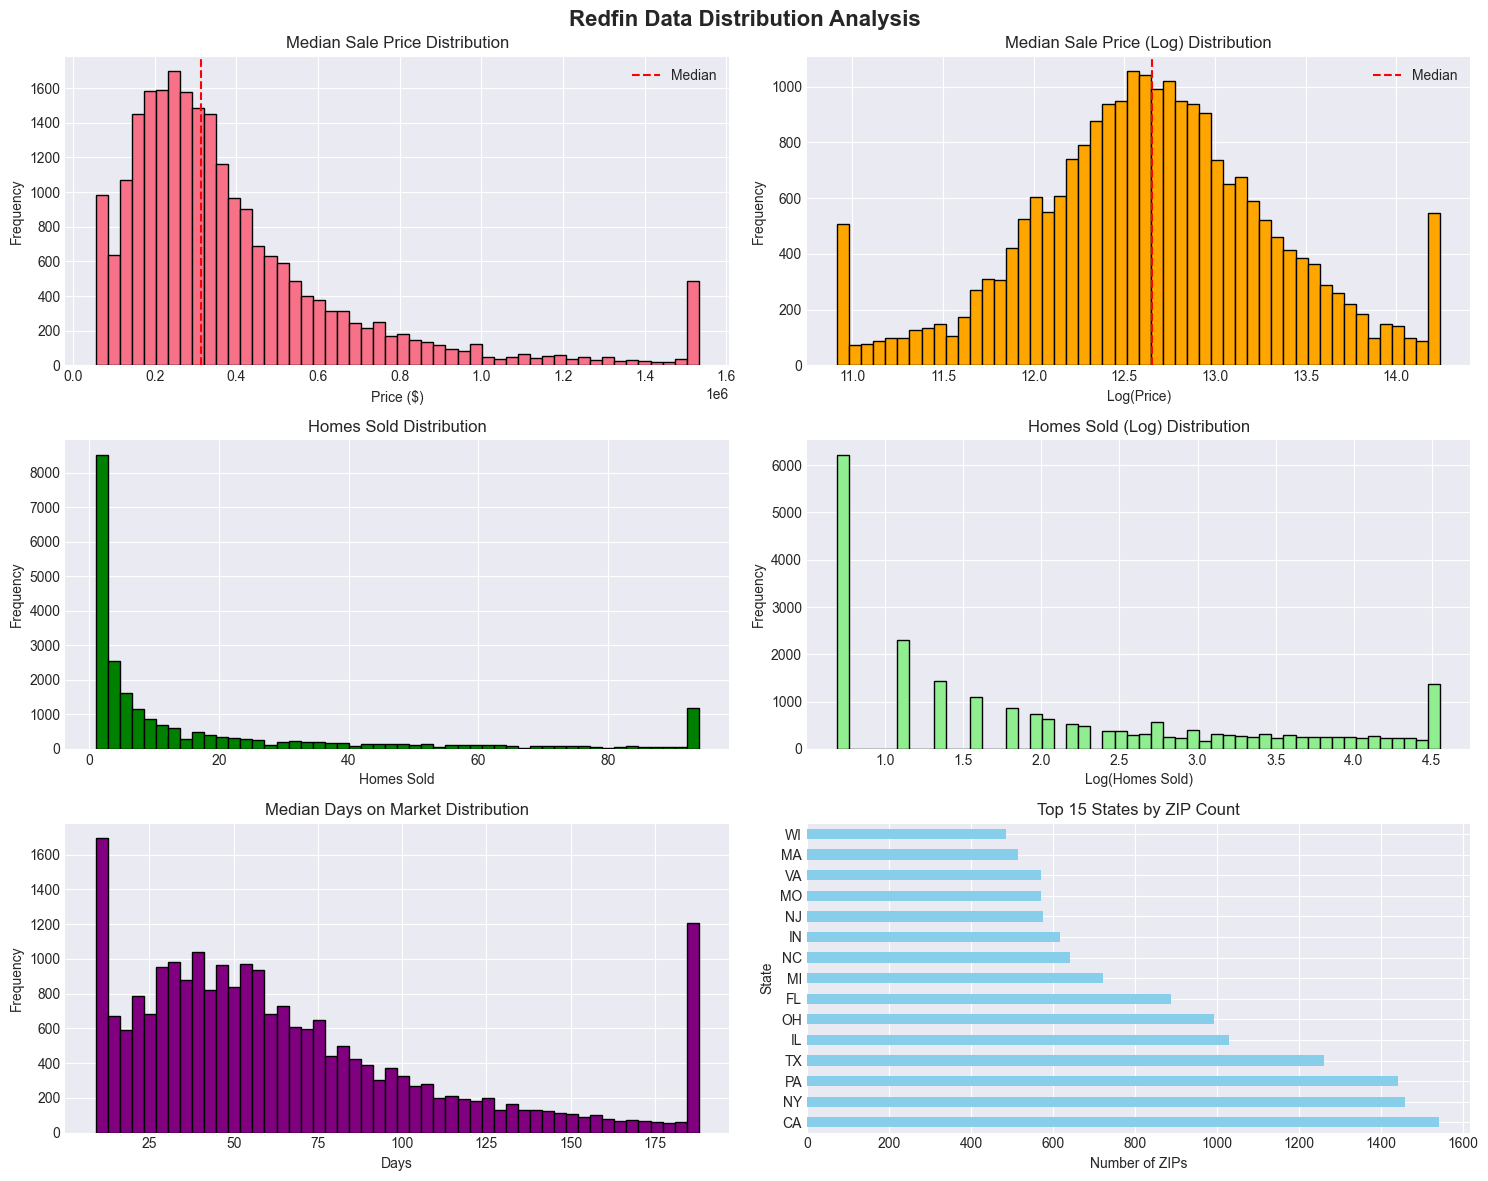


11. SUMMARY REPORT

📊 Data Quality Summary:
  - Total records: 23,334
  - Unique ZIPs: 23,334
  - Duplicate ZIPs: 0
  - States represented: 51

⚠️  Issues Found (2):
  1. 116 invalid latitudes
  2. 116 invalid longitudes

EDA COMPLETE

Files generated:
  1. redfin_data_eda.png - Distribution visualizations



In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("REDFIN DATA QUALITY & EDA REPORT")
print("="*70)

# %% [markdown]
# ## 1. Load Data

# %%
print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

with open('../data/redfin/processed/redfin_latest_optimized.json', 'r') as f:
    data = json.load(f)

# Extract metadata and data
metadata = data.get('metadata', {})
df = pd.DataFrame(data['data'])

print(f"\n✓ Data loaded successfully!")
print(f"  - Total records: {len(df):,}")
print(f"  - Generated: {metadata.get('generated_at', 'N/A')}")
print(f"  - Processing method: {metadata.get('processing_method', 'N/A')}")

# %% [markdown]
# ## 2. Basic Data Inspection

# %%
print("\n" + "="*70)
print("2. BASIC DATA INSPECTION")
print("="*70)

print("\n📊 Dataset Shape:")
print(f"  - Rows: {df.shape[0]:,}")
print(f"  - Columns: {df.shape[1]}")

print("\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# %%
# Show first few rows
df.head(10)

# %%
# Data types
df.dtypes

# %%
# Memory usage
print(f"Total Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# %% [markdown]
# ## 3. Duplicate Analysis (CRITICAL)

# %%
print("\n" + "="*70)
print("3. DUPLICATE ANALYSIS")
print("="*70)

# Check for duplicate ZIPs
duplicate_zips = df['ZIP'].duplicated().sum()
print(f"\n🔍 Duplicate ZIP codes: {duplicate_zips}")

if duplicate_zips > 0:
    print("\n⚠️  WARNING: Found duplicate ZIPs!")
    dupes = df[df['ZIP'].duplicated(keep=False)].sort_values('ZIP')
    print(f"\nSample duplicates:")
    display(dupes[['ZIP', 'CITY_NAME', 'STATE_ABBREV', 'MEDIAN_SALE_PRICE', 'PERIOD_END']].head(20))
    
    # Save duplicates to CSV for investigation
    dupes.to_csv('duplicate_zips_analysis.csv', index=False)
    print(f"\n✓ Full duplicate list saved to: duplicate_zips_analysis.csv")
else:
    print("✓ No duplicate ZIPs found")

# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\n🔍 Exact duplicate rows: {duplicate_rows}")

# %% [markdown]
# ## 4. Missing Data Analysis

# %%
print("\n" + "="*70)
print("4. MISSING DATA ANALYSIS")
print("="*70)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
}).sort_values('Missing %', ascending=False)

print("\n📊 Missing Data by Column:")
display(missing_df)

# %% [markdown]
# ## 5. Numeric Columns - Descriptive Statistics

# %%
print("\n" + "="*70)
print("5. NUMERIC COLUMNS - DESCRIPTIVE STATISTICS")
print("="*70)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Analyzing {len(numeric_cols)} numeric columns...")

# Get descriptive stats
desc = df[numeric_cols].describe()
display(desc)

# %% [markdown]
# ## 6. Original vs Log-Transformed Comparison

# %%
print("\n" + "="*70)
print("6. ORIGINAL VS LOG-TRANSFORMED COMPARISON")
print("="*70)

log_metrics = [
    'MEDIAN_SALE_PRICE',
    'MEDIAN_DOM',
    'INVENTORY',
    'HOMES_SOLD'
]

comparison_data = []

for metric in log_metrics:
    if metric in df.columns and f"{metric}_LOG" in df.columns:
        print(f"\n📊 {metric}:")
        
        original = df[metric].dropna()
        log_transformed = df[f"{metric}_LOG"].dropna()
        
        print(f"  Original:")
        print(f"    - Min: {original.min():,.2f}")
        print(f"    - Max: {original.max():,.2f}")
        print(f"    - Mean: {original.mean():,.2f}")
        print(f"    - Median: {original.median():,.2f}")
        print(f"    - Std Dev: {original.std():,.2f}")
        print(f"    - Skewness: {original.skew():.2f}")
        
        print(f"  Log-Transformed:")
        print(f"    - Min: {log_transformed.min():,.2f}")
        print(f"    - Max: {log_transformed.max():,.2f}")
        print(f"    - Mean: {log_transformed.mean():,.2f}")
        print(f"    - Median: {log_transformed.median():,.2f}")
        print(f"    - Std Dev: {log_transformed.std():,.2f}")
        print(f"    - Skewness: {log_transformed.skew():.2f}")
        
        # Calculate skewness improvement
        improvement = abs(original.skew()) - abs(log_transformed.skew())
        print(f"  ✓ Skewness improvement: {improvement:.2f}")
        
        comparison_data.append({
            'Metric': metric,
            'Original_Skew': original.skew(),
            'Log_Skew': log_transformed.skew(),
            'Improvement': improvement
        })

# Show comparison table
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

# %% [markdown]
# ## 7. Value Distribution Analysis

# %%
print("\n" + "="*70)
print("7. VALUE DISTRIBUTION ANALYSIS")
print("="*70)

print("\n📊 Checking for suspiciously common values...")

for col in ['MEDIAN_SALE_PRICE', 'HOMES_SOLD', 'INVENTORY', 'MEDIAN_DOM']:
    if col in df.columns:
        value_counts = df[col].value_counts().head(10)
        total = df[col].notna().sum()
        
        print(f"\n{col}:")
        print(f"  Top 10 most common values:")
        for val, count in value_counts.items():
            pct = (count / total * 100)
            print(f"    {val:>12}: {count:>6,} records ({pct:>5.2f}%)")
        
        # Check if any single value dominates
        if value_counts.iloc[0] / total > 0.05:  # More than 5%
            print(f"  ⚠️  WARNING: Top value appears in {(value_counts.iloc[0] / total * 100):.1f}% of records!")

# %% [markdown]
# ## 8. Geographic Distribution

# %%
print("\n" + "="*70)
print("8. GEOGRAPHIC DISTRIBUTION")
print("="*70)

if 'STATE_ABBREV' in df.columns:
    state_counts = df['STATE_ABBREV'].value_counts()
    print(f"\n📍 Top 15 States by ZIP count:")
    for state, count in state_counts.head(15).items():
        pct = (count / len(df) * 100)
        print(f"  {state}: {count:>6,} ZIPs ({pct:>5.2f}%)")
    
    print(f"\n📊 Total states represented: {len(state_counts)}")

# %% [markdown]
# ## 9. Data Quality Checks

# %%
print("\n" + "="*70)
print("9. DATA QUALITY CHECKS")
print("="*70)

issues = []

# Check 1: Negative values
print("\n🔍 Checking for negative values...")
for col in ['MEDIAN_SALE_PRICE', 'HOMES_SOLD', 'INVENTORY', 'MEDIAN_DOM']:
    if col in df.columns:
        negative = (df[col] < 0).sum()
        if negative > 0:
            print(f"  ⚠️  {col}: {negative} negative values")
            issues.append(f"{col} has {negative} negative values")
        else:
            print(f"  ✓ {col}: No negative values")

# Check 2: Zero values
print("\n🔍 Checking for zero values...")
for col in ['MEDIAN_SALE_PRICE', 'HOMES_SOLD']:
    if col in df.columns:
        zeros = (df[col] == 0).sum()
        if zeros > 0:
            pct = (zeros / len(df) * 100)
            print(f"  ⚠️  {col}: {zeros} zero values ({pct:.2f}%)")
            issues.append(f"{col} has {zeros} zero values")
        else:
            print(f"  ✓ {col}: No zero values")

# Check 3: Extremely high values
print("\n🔍 Checking for extreme outliers...")
for col in ['MEDIAN_SALE_PRICE', 'MEDIAN_DOM']:
    if col in df.columns:
        q99 = df[col].quantile(0.99)
        extreme = df[col] > q99 * 10  # 10x the 99th percentile
        extreme_count = extreme.sum()
        if extreme_count > 0:
            print(f"  ⚠️  {col}: {extreme_count} extreme outliers (>10x P99)")
            print(f"      P99: {q99:,.0f}, Max: {df[col].max():,.0f}")
            issues.append(f"{col} has {extreme_count} extreme outliers")
        else:
            print(f"  ✓ {col}: No extreme outliers")

# Check 4: Coordinate validity
if 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
    print("\n🔍 Checking coordinate validity...")
    
    invalid_lat = ((df['LATITUDE'] < 24) | (df['LATITUDE'] > 50)).sum()
    invalid_lon = ((df['LONGITUDE'] < -125) | (df['LONGITUDE'] > -66)).sum()
    
    if invalid_lat > 0:
        print(f"  ⚠️  {invalid_lat} records with invalid latitude (outside US)")
        issues.append(f"{invalid_lat} invalid latitudes")
    else:
        print(f"  ✓ All latitudes valid")
    
    if invalid_lon > 0:
        print(f"  ⚠️  {invalid_lon} records with invalid longitude (outside US)")
        issues.append(f"{invalid_lon} invalid longitudes")
    else:
        print(f"  ✓ All longitudes valid")

# %% [markdown]
# ## 10. Visualizations

# %%
print("\n" + "="*70)
print("10. GENERATING VISUALIZATIONS")
print("="*70)

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Redfin Data Distribution Analysis', fontsize=16, fontweight='bold')

# Plot 1: MEDIAN_SALE_PRICE distribution
if 'MEDIAN_SALE_PRICE' in df.columns:
    ax = axes[0, 0]
    df['MEDIAN_SALE_PRICE'].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title('Median Sale Price Distribution')
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Frequency')
    ax.axvline(df['MEDIAN_SALE_PRICE'].median(), color='red', linestyle='--', label='Median')
    ax.legend()

# Plot 2: MEDIAN_SALE_PRICE_LOG distribution
if 'MEDIAN_SALE_PRICE_LOG' in df.columns:
    ax = axes[0, 1]
    df['MEDIAN_SALE_PRICE_LOG'].hist(bins=50, ax=ax, edgecolor='black', color='orange')
    ax.set_title('Median Sale Price (Log) Distribution')
    ax.set_xlabel('Log(Price)')
    ax.set_ylabel('Frequency')
    ax.axvline(df['MEDIAN_SALE_PRICE_LOG'].median(), color='red', linestyle='--', label='Median')
    ax.legend()

# Plot 3: HOMES_SOLD distribution
if 'HOMES_SOLD' in df.columns:
    ax = axes[1, 0]
    df['HOMES_SOLD'].hist(bins=50, ax=ax, edgecolor='black', color='green')
    ax.set_title('Homes Sold Distribution')
    ax.set_xlabel('Homes Sold')
    ax.set_ylabel('Frequency')

# Plot 4: HOMES_SOLD_LOG distribution
if 'HOMES_SOLD_LOG' in df.columns:
    ax = axes[1, 1]
    df['HOMES_SOLD_LOG'].hist(bins=50, ax=ax, edgecolor='black', color='lightgreen')
    ax.set_title('Homes Sold (Log) Distribution')
    ax.set_xlabel('Log(Homes Sold)')
    ax.set_ylabel('Frequency')

# Plot 5: MEDIAN_DOM distribution
if 'MEDIAN_DOM' in df.columns:
    ax = axes[2, 0]
    df['MEDIAN_DOM'].hist(bins=50, ax=ax, edgecolor='black', color='purple')
    ax.set_title('Median Days on Market Distribution')
    ax.set_xlabel('Days')
    ax.set_ylabel('Frequency')

# Plot 6: State distribution
if 'STATE_ABBREV' in df.columns:
    ax = axes[2, 1]
    state_counts = df['STATE_ABBREV'].value_counts().head(15)
    state_counts.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title('Top 15 States by ZIP Count')
    ax.set_xlabel('Number of ZIPs')
    ax.set_ylabel('State')

plt.tight_layout()
plt.savefig('redfin_data_eda.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved to: redfin_data_eda.png")
plt.show()

# %% [markdown]
# ## 11. Summary Report

# %%
print("\n" + "="*70)
print("11. SUMMARY REPORT")
print("="*70)

print(f"\n📊 Data Quality Summary:")
print(f"  - Total records: {len(df):,}")
print(f"  - Unique ZIPs: {df['ZIP'].nunique():,}")
print(f"  - Duplicate ZIPs: {duplicate_zips}")
print(f"  - States represented: {df['STATE_ABBREV'].nunique() if 'STATE_ABBREV' in df.columns else 'N/A'}")

if issues:
    print(f"\n⚠️  Issues Found ({len(issues)}):")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print(f"\n✅ No major data quality issues detected!")

print("\n" + "="*70)
print("EDA COMPLETE")
print("="*70)
print("\nFiles generated:")
print("  1. redfin_data_eda.png - Distribution visualizations")
if duplicate_zips > 0:
    print("  2. duplicate_zips_analysis.csv - Duplicate ZIP details")
print("\n" + "="*70)

# %%